In [1]:
from rolling_nm import make_rolling_footprints
import numpy as np
import healpy as hp
import matplotlib.pylab as plt
from lsst.sims.featureScheduler.utils import standard_goals, generate_goal_map, Footprint


In [2]:
nside = 32
mjd_start=59853.5
sun_RA_start=3.27717639

footprints_hp = standard_goals(nside=nside)
footprints = Footprint(mjd_start, sun_RA_start=sun_RA_start, nside=nside)
for i, key in enumerate(footprints_hp):
    footprints.footprints[i, :] = footprints_hp[key]

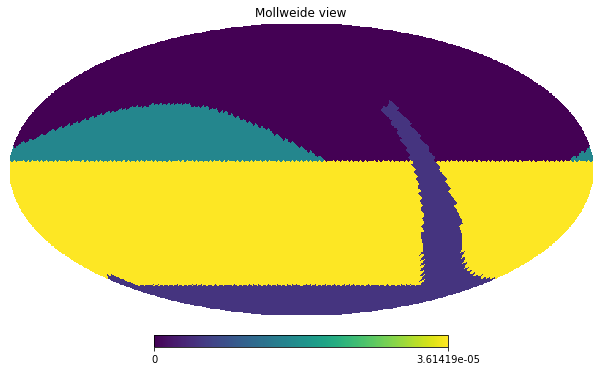

In [3]:
hp.mollview(footprints(mjd_start+365.5*2)['r'])

In [4]:
rolling_fp = make_rolling_footprints(mjd_start=mjd_start, sun_RA_start=sun_RA_start, nside=nside, nslice=2)

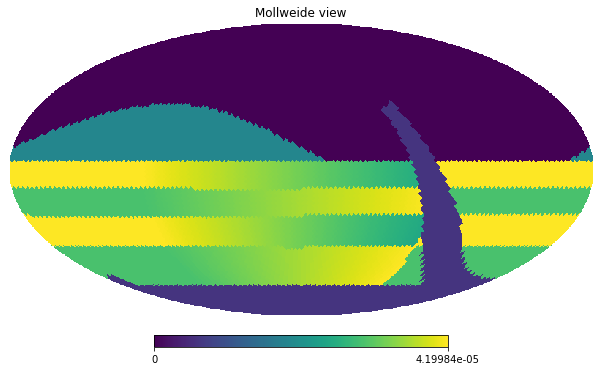

In [5]:
hp.mollview(rolling_fp(mjd_start+365.25*2)['r'])

In [6]:
ack = rolling_fp(mjd_start+365.25*2)['r']
np.where(ack ==np.max(ack))

(array([ 5731,  5732,  5733, ..., 10006, 10017, 10018]),)

In [7]:
days = np.arange(0, 365.25*10, 10)

In [51]:
indx = 10006
plain = []
roll = []
inner1 = []

for day in days:
    plain.append(footprints.estimate_counts(mjd_start+day, nvisits=2.2e6/3652*day)['r'][indx])
    roll.append(rolling_fp.estimate_counts(mjd_start+day, nvisits=2.2e6/3652*day)['r'][indx])
    #inner1.append( rolling_fp.footprint_list[2].estimate_counts(mjd_start+day, nvisits=2.2e6/3652*day, norm=False)['r'][indx])

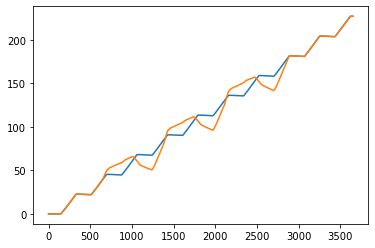

In [48]:
plt.plot(days, plain)
plt.plot(days,roll)
#plt.plot(days,inner1)

In [ ]:
# Fuuuuuck. counts shouldn't be going down. And looks slightly out of phase. 
# wait, why are there two rolling footprints? Should only need one I think.--no, one for each section, makes sense.

In [ ]:
rolling_fp.footprint_list

In [41]:
from lsst.sims.featureScheduler.utils import Step_line, Step_slopes

In [42]:
scale=0.8
nslice=2
down = 1.-scale
up = nslice - down*(nslice-1)
start = [1., 1., 1.]
end = [1., 1., 1., 1., 1., 1.]
rolling = [up, down, up, down, up, down]

all_slopes = [start + np.roll(rolling, i).tolist()+end for i in range(nslice)]


ack= Step_slopes(rise=all_slopes[0])
ack2 = Step_slopes(rise=all_slopes[1])
norm = Step_line()

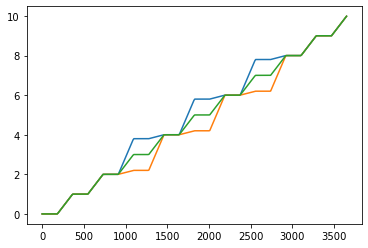

In [43]:
plt.plot(days,ack(days, 0))
plt.plot(days,ack2(days, 0))
plt.plot(days,norm(days, 0))

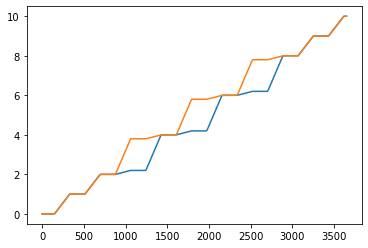

In [44]:
plt.plot(days, rolling_fp.footprint_list[2].step_func(days, rolling_fp.footprint_list[1].phase[indx]))
plt.plot(days, rolling_fp.footprint_list[1].step_func(days, rolling_fp.footprint_list[1].phase[indx]))

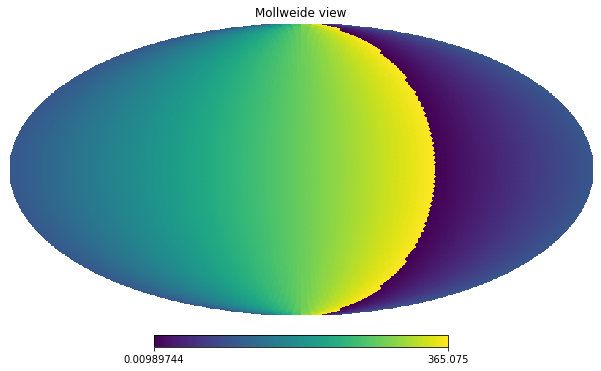

In [45]:
hp.mollview(rolling_fp.footprint_list[1].phase)